In [ ]:
# 颜色三通道

[[89 91 94 95 94]
 [87 89 92 93 93]
 [85 85 86 88 89]
 [89 87 86 87 89]
 [91 90 90 91 91]]
[[103 106 109 110 110]
 [100 103 106 107 107]
 [ 99  99  99 102 103]
 [104 102 101 102 103]
 [104 103 104 105 105]]
[[130 131 135 137 136]
 [127 129 132 133 134]
 [127 126 125 128 131]
 [130 128 127 128 130]
 [131 129 130 132 134]]


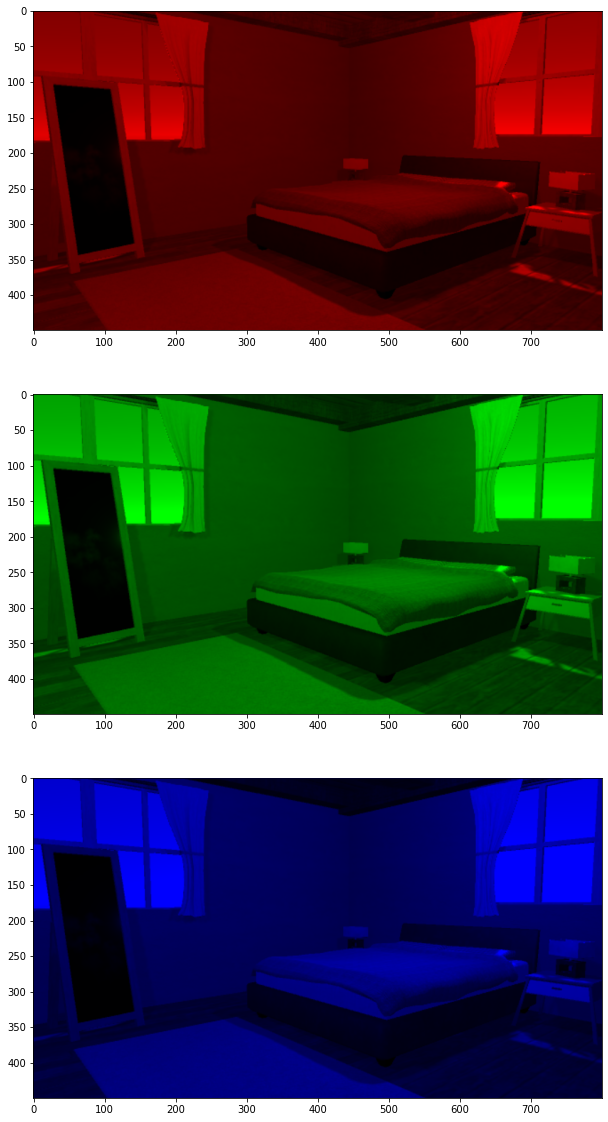

In [1]:
import matplotlib.pyplot as plt

#       非常重要不要删掉
#  C:\Users\jiant\Desktop\code\VR\materials\bed-virtual.png
#  C:\Users\jiant\Desktop\code\VR\materials\bed-virtual.png
'''用split和merge函数对图像通道进行处理，提取出R,G,B三色通道'''
import cv2
import numpy as np
import imageio

image = imageio.imread(r'C:\Users\jiant\Pictures\bed\bed_1.png')
# If you want to see the actual colors instead of just grey images,
# you need to retain all three channels and set the values on the other channels to zero.
# For example, to get the red component, set the green and blue channel values to 0,
# as shown below:
red_image = image.copy()
red_image[:, :, 0] = 0
red_image[:, :, 2] = 0
blue_img = image.copy()
blue_img[:, :, 1] = 0
blue_img[:, :, 2] = 0
green_img = image.copy()
green_img[:, :, 0] = 0
green_img[:, :, 1] = 0
blue_single = blue_img[:, :, 0]
red_single = red_image[:, :, 1]
green_single = green_img[:, :, 2]
print(blue_single[248:253, 598:603])
print(red_single[248:253, 598:603])
print(green_single[248:253, 598:603])

plt.rcParams['figure.figsize'] = (20, 20)  # 单位是inches
plt.subplot(3, 1, 1)
plt.imshow(blue_img)
plt.subplot(3, 1, 2)
plt.imshow(red_image)
plt.subplot(3, 1, 3)
plt.imshow(green_img)

In [ ]:
# 给图片增加高斯噪声 & 椒盐噪声

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


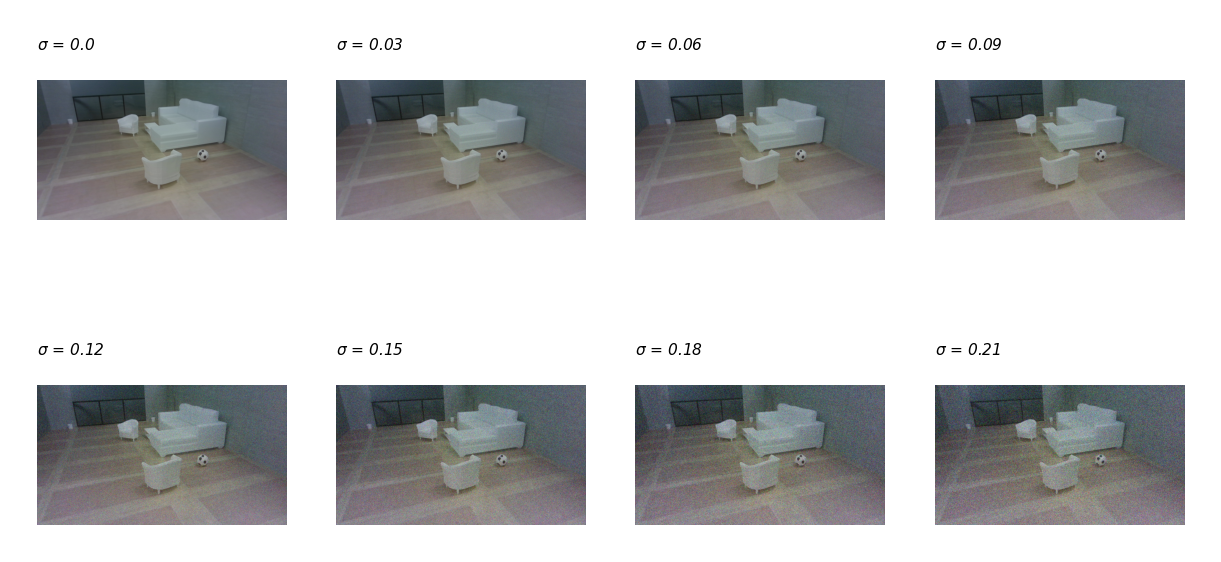

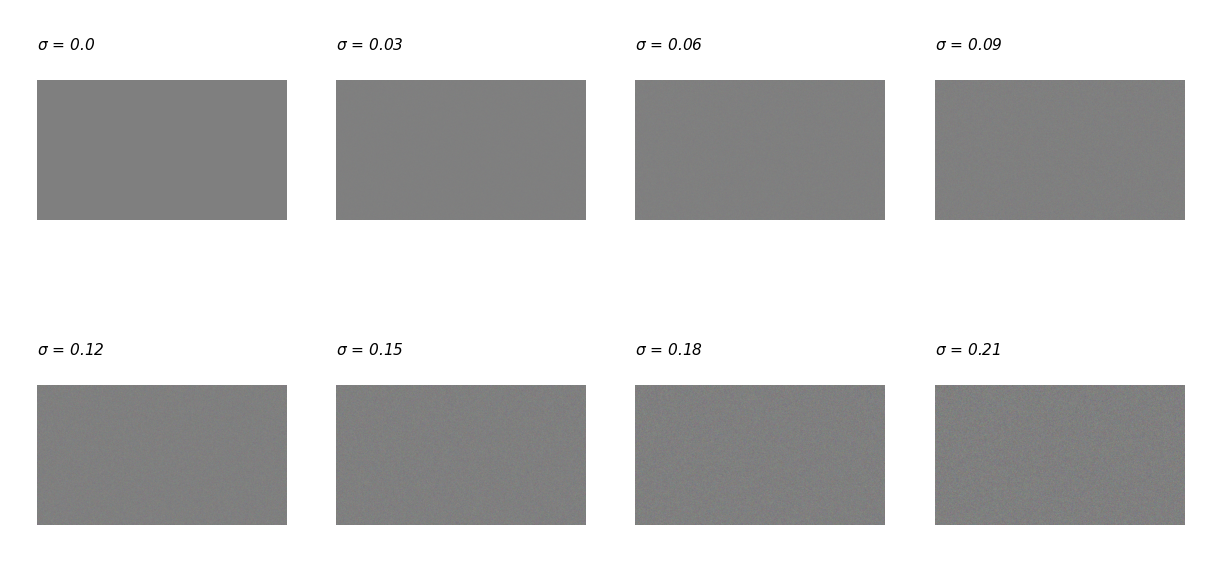

In [2]:
import cv2
import matplotlib.image as mping
import matplotlib.pyplot as plt
import numpy as np


def gaussian_noise(img, mean, sigma):
    '''
    此函数用将产生的高斯噪声加到图片上
    传入:
        img   :  原图
        mean  :  均值
        sigma :  标准差
    返回:
        gaussian_out : 噪声处理后的图片
        noise        : 对应的噪声
    '''
    # 将图片灰度标准化
    img = img / 255
    # 产生高斯 noise
    noise = np.random.normal(mean, sigma, img.shape)
    # 将噪声和图片叠加
    gaussian_out = img + noise
    # 将超过 1 的置 1，低于 0 的置 0
    gaussian_out = np.clip(gaussian_out, 0, 1)
    # 将图片灰度范围的恢复为 0-255
    gaussian_out = np.uint8(gaussian_out * 255)
    # 将噪声范围搞为 0-255
    # noise = np.uint8(noise*255)
    return gaussian_out, noise  # 这里也会返回噪声，注意返回值


# 读取图片
src = cv2.imread(r'C:\Users\jiant\Desktop\data\V&R-objectDetectionData\unlabeled\real-0817-daylight-withman\219.jpg')

# 创建绘图 figure
fig_out = plt.figure(figsize=(4, 2), dpi=370)  # figsize宽高比
fig_noise = plt.figure(figsize=(4, 2), dpi=370)

for i in range(0, 8):
    # 将图片和不同的噪声叠加
    gaussian_out, noise = gaussian_noise(src, 0, 0.03 * i)
    # 创建 AxesSubplot 对象
    ax_out = fig_out.add_subplot(i + 241)
    ax_noise = fig_noise.add_subplot(i + 241)
    # 将丑兮兮的坐标抽去掉
    ax_out.axis('off')
    ax_noise.axis('off')
    # 设置标题
    ax_out.set_title('$\sigma$ = ' + str(0.03 * i), loc='left', fontsize=3, fontstyle='italic')
    ax_noise.set_title('$\sigma$ = ' + str(0.03 * i), loc='left', fontsize=3, fontstyle='italic')
    # 图片展示
    ax_out.imshow(gaussian_out, cmap='gray')
    ax_noise.imshow((noise + 1) / 2, cmap='gray')

# 保存图片
fig_out.savefig('1_Peppers_noise.png')
fig_noise.savefig('1_Guassion_noise.png')
# 图片显示
plt.show()


In [ ]:
# 画出yolo 系列的FPS

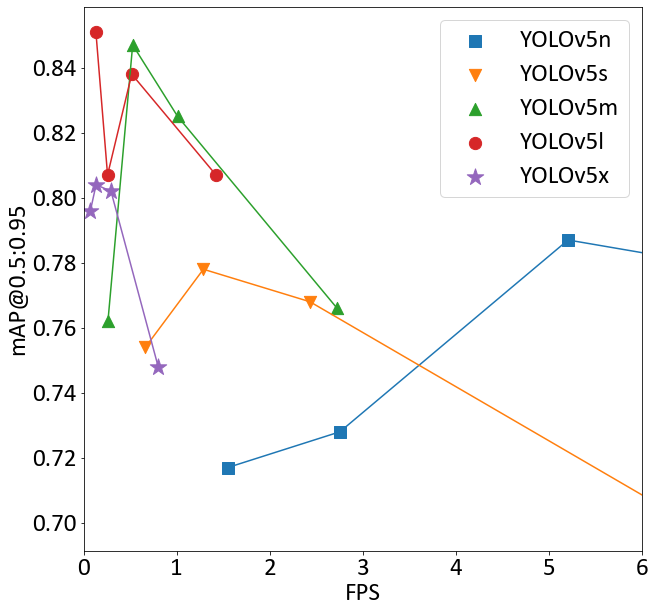

In [3]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import numpy as np

plt.rcParams['figure.figsize'] = (10, 10)  # 单位是inches
fig, axs = plt.subplots(1, 1)

plt.ylabel('mAP@0.5:0.95', fontdict={'family': 'Calibri', 'size': 25})
plt.xlabel('FPS', fontdict={'family': 'Calibri', 'size': 25})

plt.xlim((0, 6))
# plt.ylim((0.5, 0.83))
# my_x_ticks = np.arange(0, 10, 2)
# my_y_ticks = np.arange(0.5, 0.9, 0.1)
# plt.yticks(my_y_ticks, fontproperties='Calibri', size=25)
# plt.xticks(my_x_ticks, fontproperties='Calibri', size=25)
# plt.xticks([1.3, 2.3, 3.3, 4.3, 5.3], [r'$n$', r'$s$', r'$m$', r'$l$', r'$x$'], size=25)

plt.yticks(fontproperties='Calibri', size=25)
plt.xticks(fontproperties='Calibri', size=25)

FPS_model_n = [13.5685, 5.2083, 2.7548, 1.5479]  # img size 256, 512, 640, 736
AP_model_n = [0.746, 0.787, 0.728, 0.717]  # img size 256, 512, 640, 736
FPS_model_s = [6.5789, 2.433, 1.287, 0.6631]
AP_model_s = [0.699, 0.768, 0.778, 0.754]
FPS_model_m = [2.7247, 1.0101, 0.5265, 0.2606]
AP_model_m = [0.766, 0.825, 0.847, 0.762]
FPS_model_l = [1.4224, 0.5165, 0.2565, 0.1311]
AP_model_l = [0.807, 0.838, 0.807, 0.851]
FPS_model_x = [0.8012, 0.2934, 0.1331, 0.07198]
AP_model_x = [0.748, 0.802, 0.804, 0.796]

plt.scatter(FPS_model_n, AP_model_n, label='YOLOv5n', s=150, marker="s")
plt.plot(FPS_model_n, AP_model_n)
plt.scatter(FPS_model_s, AP_model_s, label='YOLOv5s', s=150, marker="v")
plt.plot(FPS_model_s, AP_model_s)
plt.scatter(FPS_model_m, AP_model_m, label='YOLOv5m', s=150, marker="^")
plt.plot(FPS_model_m, AP_model_m)
plt.scatter(FPS_model_l, AP_model_l, label='YOLOv5l', s=150, marker="o")
plt.plot(FPS_model_l, AP_model_l)
plt.scatter(FPS_model_x, AP_model_x, label='YOLOv5x', s=300, marker="*")
plt.plot(FPS_model_x, AP_model_x)

plt.legend(prop={'family': 'Calibri', 'size': 25})
# 显示出所有设置
plt.show()

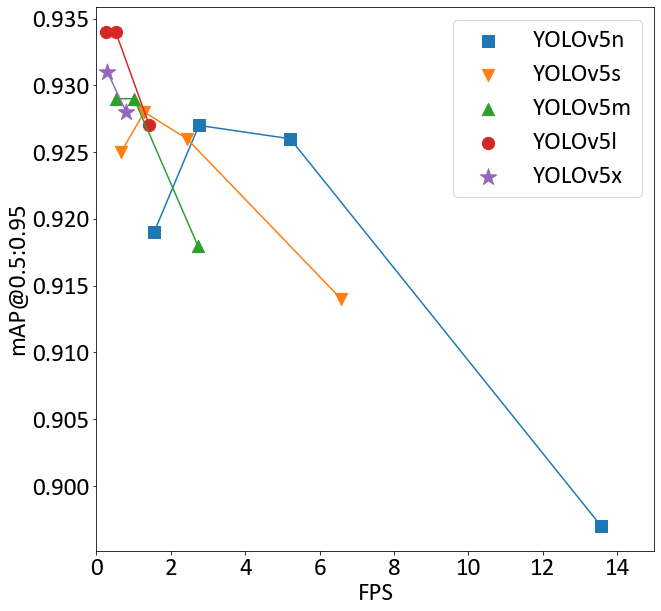

In [6]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import numpy as np

plt.rcParams['figure.figsize'] = (10, 10)  # 单位是inches
fig, axs = plt.subplots(1, 1)

plt.ylabel('mAP@0.5:0.95', fontdict={'family': 'Calibri', 'size': 25})
plt.xlabel('FPS', fontdict={'family': 'Calibri', 'size': 25})

plt.xlim((0, 15))
# plt.ylim((0.5, 0.83))
# my_x_ticks = np.arange(0, 10, 2)
# my_y_ticks = np.arange(0.5, 0.9, 0.1)
# plt.yticks(my_y_ticks, fontproperties='Calibri', size=25)
# plt.xticks(my_x_ticks, fontproperties='Calibri', size=25)
# plt.xticks([1.3, 2.3, 3.3, 4.3, 5.3], [r'$n$', r'$s$', r'$m$', r'$l$', r'$x$'], size=25)

plt.yticks(fontproperties='Calibri', size=25)
plt.xticks(fontproperties='Calibri', size=25)

FPS_model_n = [13.5685, 5.2083, 2.7548, 1.5479]  # img size 256, 512, 640, 736
AP_model_n = [0.897, 0.926, 0.927, 0.919]  # img size 256, 512, 640, 736
FPS_model_s = [6.5789, 2.433, 1.287, 0.6631]
AP_model_s = [0.914, 0.926, 0.928, 0.925]
FPS_model_m = [2.7247, 1.0101, 0.5265, 0.2606]
AP_model_m = [0.918, 0.929, 0.929, None]
FPS_model_l = [1.4224, 0.5165, 0.2565, 0.1311]
AP_model_l = [0.927, 0.934, 0.934, None]
FPS_model_x = [0.8012, 0.2934, 0.1331, 0.07198]
AP_model_x = [0.928, 0.931, None, None]

plt.scatter(FPS_model_n, AP_model_n, label='YOLOv5n', s=150, marker="s")
plt.plot(FPS_model_n, AP_model_n)
plt.scatter(FPS_model_s, AP_model_s, label='YOLOv5s', s=150, marker="v")
plt.plot(FPS_model_s, AP_model_s)
plt.scatter(FPS_model_m, AP_model_m, label='YOLOv5m', s=150, marker="^")
plt.plot(FPS_model_m, AP_model_m)
plt.scatter(FPS_model_l, AP_model_l, label='YOLOv5l', s=150, marker="o")
plt.plot(FPS_model_l, AP_model_l)
plt.scatter(FPS_model_x, AP_model_x, label='YOLOv5x', s=300, marker="*")
plt.plot(FPS_model_x, AP_model_x)

plt.legend(prop={'family': 'Calibri', 'size': 25})
# 显示出所有设置
plt.show()

# 画出虚拟数据增强结果图

In [14]:
AP_model_n = [0.582, 0.744, 0.763, 0.842, 0.855, 0.858]
AP_model_n_vr = [0.673, 0.716, 0.806, 0.77, 0.849, 0.884]
AP_model_n2 = [0.579, 0.677, 0.783, 0.746, 0.853, 0.852]
AP_model_n_vr2 = [0.626, 0.788, 0.806, 0.83, 0.772, 0.882]
AP_model_n3 = [0.594, 0.708, 0.737, 0.804, 0.849, 0.799]
AP_model_n_vr3 = [0.597, 0.713, 0.804, 0.81, 0.841, 0.865]

ap_model_n = [(AP_model_n[0] + AP_model_n2[0] + AP_model_n3[0]) / 3,
              (AP_model_n[1] + AP_model_n2[1] + AP_model_n3[1]) / 3,
              (AP_model_n[2] + AP_model_n2[2] + AP_model_n3[2]) / 3,
              (AP_model_n[3] + AP_model_n2[3] + AP_model_n3[3]) / 3,
              (AP_model_n[4] + AP_model_n2[4] + AP_model_n3[4]) / 3,
              (AP_model_n[5] + AP_model_n2[5]) / 2]

ap_model_n_vr = [(AP_model_n_vr[0] + AP_model_n_vr2[0] + AP_model_n_vr3[0]) / 3,
                 (AP_model_n_vr[1] + AP_model_n_vr2[1] + AP_model_n_vr3[1]) / 3,
                 (AP_model_n_vr[2] + AP_model_n_vr2[2] + AP_model_n_vr3[2]) / 3,
                 (AP_model_n_vr[3] + AP_model_n_vr2[3] + AP_model_n_vr3[3]) / 3,
                 (AP_model_n_vr[4] + AP_model_n_vr3[4]) / 2,  # 那一次的数据异常值了
                 (AP_model_n_vr[5] + AP_model_n_vr2[5] + AP_model_n_vr3[5]) / 3]

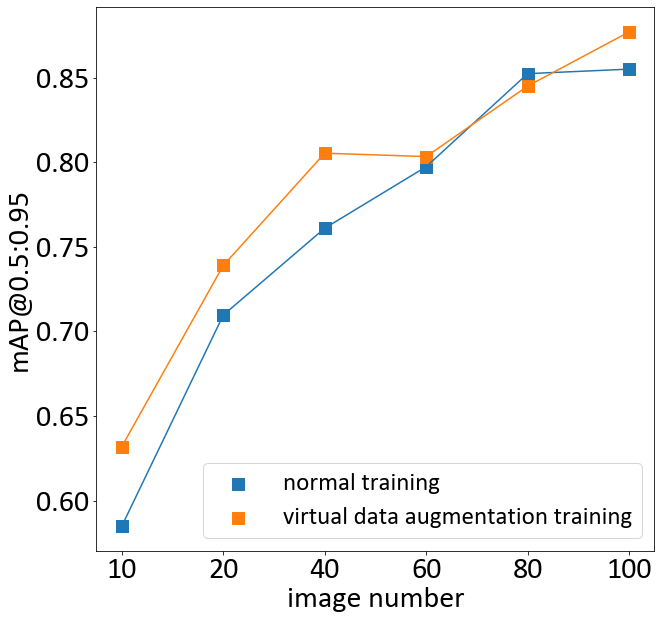

In [15]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import numpy as np

plt.rcParams['figure.figsize'] = (10, 10)  # 单位是inches
fig, axs = plt.subplots(1, 1)

plt.ylabel('mAP@0.5:0.95', fontdict={'family': 'Calibri', 'size': 30})
plt.xlabel('image number', fontdict={'family': 'Calibri', 'size': 30})

# plt.xlim((0, 15))
# plt.ylim((0.5, 0.83))
# my_x_ticks = np.arange(0, 10, 2)
# my_y_ticks = np.arange(0.5, 0.9, 0.1)
# plt.yticks(my_y_ticks, fontproperties='Calibri', size=25)
# plt.xticks(my_x_ticks, fontproperties='Calibri', size=25)
# plt.xticks([1.3, 2.3, 3.3, 4.3, 5.3], [r'$n$', r'$s$', r'$m$', r'$l$', r'$x$'], size=25)

plt.yticks(fontproperties='Calibri', size=30)
plt.xticks(fontproperties='Calibri', size=30)

num_model_n = [1, 2, 3, 4, 5, 6]  # 10, 20, 40, 60, 80, 100
num_model_n_vr = [1, 2, 3, 4, 5, 6]
AP_model_n = [0.582, 0.744, 0.763, 0.842, 0.855, 0.858]
AP_model_n_vr = [0.673, 0.716, 0.806, 0.77, 0.849, 0.884]
AP_model_n2 = [0.579, 0.677, 0.783, 0.746, 0.853, 0.852]
AP_model_n_vr2 = [0.626, 0.788, 0.806, 0.83, 0.772, 0.882]
AP_model_n3 = [0.594, 0.708, 0.737, 0.804, 0.849, 0.799]
AP_model_n_vr3 = [0.597, 0.713, 0.804, 0.81, 0.841, 0.865]

# plt.scatter(num_model_n, AP_model_n, label='normal training', s=150, marker="s")
# plt.plot(num_model_n, AP_model_n)
# plt.scatter(num_model_n, AP_model_n2, label='normal training', s=150, marker="s")
# plt.plot(num_model_n, AP_model_n2)

plt.scatter(num_model_n, ap_model_n, label='normal training', s=150, marker="s")
plt.plot(num_model_n, ap_model_n)
plt.scatter(num_model_n, ap_model_n_vr, label='virtual data augmentation training', s=150, marker="s")
plt.plot(num_model_n, ap_model_n_vr)

plt.setp(axs, xticks=[1, 2, 3, 4, 5, 6], xticklabels=["10", "20", "40", "60", "80", "100"])

plt.legend(prop={'family': 'Calibri', 'size': 25})
# 显示出所有设置
plt.show()